# Homework 3: Hard spheres

Luca Grandinetti, Iacopo Poli, Davide Romanin, Gennaro Tucci

## 1. 1D hard spheres : clothespins model

In [1]:
import random as rnd
import math
import time

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

from math import e
from math import atan2

### 1.1 Direct sampling strategy

In [4]:
sigma = 0.75 # radius of the particles
L = 8 # total length
n = 2 # number of particles
x1 = []
x2 = []
t = 100000 # number of iterations

for i in xrange(t):
    f1 = sigma+(L-2*sigma)*rnd.random()
    f2 = sigma+(L-2*sigma)*rnd.random()
    
    if abs(f1-f2) > 2*sigma:
        x1.append(f1)
        x2.append(f2)

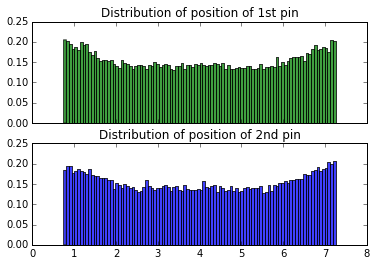

In [9]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(x1, 100, normed=1, facecolor='green', alpha=0.75)
axarr[0].set_title('Distribution of position of 1st pin')
axarr[1].hist(x2, 100, normed=1, facecolor='blue', alpha=0.75)
axarr[1].set_title('Distribution of position of 2nd pin')
plt.show() 

The two particles have the same distribution, which is not uniform: it is higher at the edges of the washline because of the reduction of the excluded volume.

### 1.2 Wrong direct sampling

In [11]:
sigma = 0.75
L = 8
n = 2
x1 = []
x2 = []
t = 100000

for i in xrange(t):
    
    f1=sigma+(L-2*sigma)*rnd.random()
    f2=sigma+(L-2*sigma)*rnd.random()
    
    while abs(f1-f2)<2*sigma:
        
        f2=sigma+(L-2*sigma)*rnd.random()
        
    x1.append(f1)
    x2.append(f2)

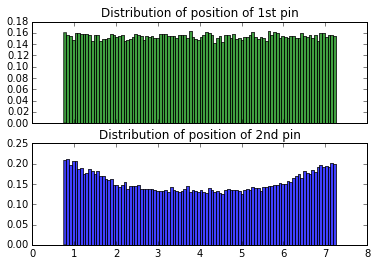

In [12]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(x1, 100, normed=1, facecolor='green', alpha=0.75)
axarr[0].set_title('Distribution of position of 1st pin')
axarr[1].hist(x2, 100, normed=1, facecolor='blue', alpha=0.75)
axarr[1].set_title('Distribution of position of 2nd pin')
plt.show()

The first particle has an uniform distribution. As a consequence, the second particle has a distribution similar to the case of the correct sampling, but the part that feels the reduction of the excluded volume is larger.

### 1.3 Direct sampling of N pins

Warning: this point is written in Python3

In [19]:
sigma=0.1
L=10
nmax=25
nmin=2
t=10000

count=[0]*(nmax-nmin+1)

for j in range(nmin,nmax+1):
    
    x=[[]]*j
    f=[0]*j
    for i in range(t):
        for s in range(j):
            f[s]=sigma+(L-2*sigma)*random.random()
    
        for k in range(j-1):
            
            flag=0
            
            for l in range(k+1,j):
            
                if abs(f[k]-f[l])<2*sigma:
                    
                    flag=1
                    
                    break
        
            if flag==1: 
                count[j-nmin]+=1
                break
            
         
        for y in range(j):
            x[y]=x[y]+[f[y]]
            
            
for i in range(nmax-nmin+1): count[i]=count[i]/t

In [ ]:
# rejection rate in function of the number of particles

plt.plot([i+nmin for i in range(nmax-nmin+1)],count,'r')
plt.axis([nmin,nmax,0,1.5])      

<img src="rejection-rate.png"/>

### 1.4 Clever sampling

In [24]:
nmax = 25
nmin = 2
sigma = 0.1
L = 10
tau = []

for n in xrange(nmin,nmax+1):
    
    t1 = time.time()
    x = [0 for i in xrange(n)]
    for s in xrange(n):
        x[s]=(L-2*n*sigma)*rnd.random()
    
    x.sort()
            
    for i in range(n):
        x[i]+=(2*(i+1)-1)*sigma
    
    t2 = time.time()
    tau.append(t2-t1)

# Evaluation of the running time
# it is almost instantaneous
for i in xrange(len(tau)): print tau[i]

2.00271606445e-05
1.21593475342e-05
1.09672546387e-05
1.90734863281e-05
2.19345092773e-05
1.50203704834e-05
2.40802764893e-05
0.000378131866455
3.60012054443e-05
3.00407409668e-05
6.48498535156e-05
3.69548797607e-05
7.31945037842e-05
9.79900360107e-05
5.72204589844e-05
5.60283660889e-05
5.60283660889e-05
6.103515625e-05
5.81741333008e-05
6.38961791992e-05
6.69956207275e-05
8.89301300049e-05
4.6968460083e-05
6.48498535156e-05


### 1.5 Clever uniform with 10 particles

In [40]:
n = 10 
sigma = 0.75 
L = 20

t = 100000
x = [[0 for i in xrange(n)] for j in xrange(t)]

for i in xrange(t):
    for s in xrange(n):
        x[i][s]=(L-2*n*sigma)*rnd.random()
        
    x[i].sort()
    
    for j in xrange(n):
        x[i][j]+=(2*(j+1)-1)*sigma

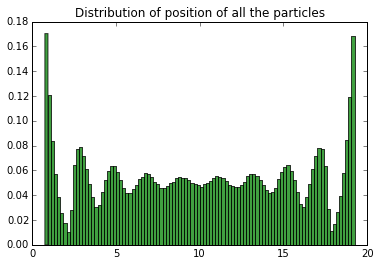

In [41]:
y=[0]*t
s=[]
nbin=200

for i in range(n):
    for j in range(t):
        y[j]=x[j][i]
    s=s+y

n, bins, patches = plt.hist(s, 100, normed=1, facecolor='green', alpha=0.75)
plt.title("Distribution of position of all the particles")
plt.show()

### 1.6 Analytical density distribution

For the clothespins model the Boltzmann weights are $1$ if the configuration is allowed and $0$ otherwise. This means that the partition function is just the number of admissible configurations.
The density can be interpreted as the number of admissible configurations with the constraint that one particle is in the position $x$, divided by the total number of configurations.

$$\rho(x)=E[\sum_i  \delta(X_i-x)] = \sum_i \int \prod_k dx_k \delta(x-x_i) P\left (\left \{ x \right \} \right ) = \sum_i P(X_i=x)$$

Staring a particle at position $x$, then at the left of particle we have a "washline" of length $x-\sigma$ with $n$ particles and on the right we have a washline of length $L-x-\sigma$ and $N-n-1$ particles. There are ${N-1}\choose{n}$ configurations with $n$ particles at the left of the fixed particle so 
$$
\sum_i P(X_i=x | n) = {{N-1}\choose{n}} \frac{Z(n,x-\sigma)  Z(N-n-1,L-x-\sigma)}{Z(N,L)}
$$
This means that the density can be written as:
$$
\rho(x)= \sum_{n=0}^{N-1}  {{N-1}\choose{n}} \frac{Z(n,x-\sigma)  Z(N-n-1,L-x-\sigma)}{Z(N,L)}
$$

In [6]:
from scipy.special import binom

def Z(n, l, sigma = 0.75):
    if l > 2*n*sigma:
        return (l-2*n*sigma)**n
    else:
        return 0
    
def rho(x, N = 10, L = 20, sigma = 0.25):
    r = 0
    for n in xrange(N):
        r = r + (Z(n, x-sigma)*Z(N-n-1,L-x-sigma))*binom(N-1,n)
    return r/Z(N, L, sigma)

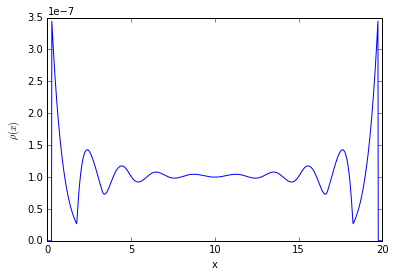

In [12]:
N_bin = 1000
x = [i*20.0/N_bin for i in xrange(N_bin)]
Rho = [rho(x[i])*20.0/N_bin for i in xrange(N_bin)]

plt.plot(x,Rho)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')

## 2. MCMC for 2D Hard Spheres

### 2.1 Direct Sampling

In [16]:
class lattice:
    # Creates a lattice, when instantiated it is 
    # initialized to the positions passed as 
    # argument. Equipped with a plot method.
    
    def __init__(self, x, y, side_length):
        self.pos = zip(x, y)
        self.L = side_length
    
    def plot(self, **kwargs):
        self.title = kwargs.get("title", None)
        x_val = [x[0] for x in self.pos]
        y_val = [y[1] for y in self.pos]
        plt.plot(x_val, y_val, "o")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim([0, self.L])
        plt.ylim([0, self.L])
        plt.grid('on')
        plt.axes().set_aspect('equal')
        plt.title(self.title)
        plt.show()

In [17]:
def direct_sampling_PBC(ndiscs):
    # Function which does direct sampling of the
    # positions of the disks, the first is always
    # accepted, the other are accepted only if 
    # don't overlap with existing disks
    
    x = np.asarray([])
    y = np.asarray([])
    accepted = 0
    counter = 0
    while accepted < ndiscs:
        # Increases for each trial
        counter +=1
        
        # Draw position of a disk
        x_try = np.random.random()*L
        y_try = np.random.random()*L
        
        # Compute the minimum distance
        min_distance = float("inf")
        for x0, y0 in zip(x, y):
            distance_along_x = np.abs(x_try - x0)
            distance_along_y = np.abs(y_try - y0)
            if distance_along_x > L/2.0:
                distance_along_x -= L
            if distance_along_y > L/2.0:
                distance_along_y -= L
            distance = np.sqrt(distance_along_x**2 + distance_along_y**2)
            if distance < min_distance:
                min_distance = distance
        
        # If it's the first, accept it anyway 
        if accepted == 0:
            x = np.append(x, [x_try])
            y = np.append(y, [y_try])
            accepted += 1
        
        # Accept if it doesn't overlap with others.
        # Notice that at the first draw this condition is false, 
        # because x_try and x are the same.
        # At subsequent draws the accepted == 0 is always false
        # and this is the only condition which can evaluate to true.
        
        elif min_distance >2*r:
            x = np.append(x, [x_try])
            y = np.append(y, [y_try])
            accepted += 1
        
        # Otherwise restart from beginning - TABULA RASA REJECTION
        # not doing this -> configurations wouldn't be equiprobable
        else:
            accepted = 0
            x = np.asarray([])
            y = np.asarray([])
        
    rejection_rate = 1-float(accepted)/counter
    
    return x, y, rejection_rate

Other  19  experiments to go
Other  18  experiments to go
Other  17  experiments to go
Other  16  experiments to go
Other  15  experiments to go
Other  14  experiments to go
Other  13  experiments to go
Other  12  experiments to go
Other  11  experiments to go
Other  10  experiments to go
Other  9  experiments to go
Other  8  experiments to go
Other  7  experiments to go
Other  6  experiments to go
Other  5  experiments to go
Other  4  experiments to go
Other  3  experiments to go
Other  2  experiments to go
Other  1  experiments to go
Other  0  experiments to go
Done


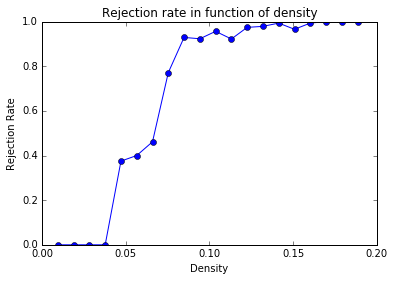

In [19]:
# Initialization of the parameters:
# - L is the side length
# - r is their radius
# - nmax is the max number of disks

L = 20
r = 1.2
nmax = 20

# Save rejection rates, densities and 
# configurations in lists
RR = []
density = []
graphs = []

for m in xrange(1, nmax+1):
    # m is the number of disks
    rho = np.pi*(r/L**2)*m
    density.append(rho)
    x, y, rejection_rate = direct_sampling_PBC(m)
    RR.append(rejection_rate)
    graphs.append(lattice(x, y, L))
    print "Other ", nmax-m, " experiments to go"

print "Done"

plt.plot(density, RR, "o-")
plt.xlabel("Density")
plt.ylabel("Rejection Rate")
plt.title("Rejection rate in function of density")

We can't reach large densities with this approach. As shown in the graph above, the rejection rate approaches $1$ at density slightly higher than $0.10$. To go further we need to change sampling method.

### 2.2 and 2.3  Markov Chain Monte Carlo

In [9]:
class square_lattice_PBC:
    # Regular square lattice, if initialization
    # is impossible, an error is raised. 
    # It has a cell subclass, which is used to 
    # build the grid for the O(1) algorithm.
    # Equipped with a method for performing MCMC 
    # steps, an update positions method and a
    # plot method.
    
    # Helper class to keep track of disks in each
    # cell and to have the list of neighbors to
    # check.
    class cell:
        def __init__(self):
            self.disks = []
            self.neighbors = set()
    
    def __init__(self, side_length, m, radius):
        # Condition for being able to initialize
        # a regular square lattice
        if 2*radius*m <= side_length:
            self.L = side_length
            self.M = m
            self.N = m**2
            self.r = radius
            
            self.pos = []
            x = []
            for i in xrange(0, m):
                coord = self.L/(2.0*self.M)*(2*i+1)
                x.append(coord)
            
            for i in x:
                for j in x:
                    self.pos.append((i, j))
            
            # Initialization of the grid
            self.grid = [[self.cell() for i in xrange(0, m)] for j in xrange(0, m)]
            
            for x, y in self.pos:
                # Discretize indices
                ix = int(self.M*x/self.L)
                iy = int(self.M*y/self.L)
                self.grid[ix][iy].disks.append((x, y))
                # I have to include the cell itself because I can have
                # more than one disk in it
                self.grid[ix][iy].neighbors.update([(ix, iy)])
                # Build the neighborhood
                if ix == self.M-1:
                    self.grid[ix][iy].neighbors.update([(0, iy)])
                    self.grid[ix][iy].neighbors.update([(ix-1, iy)])
                    if iy == self.M-1:
                        self.grid[ix][iy].neighbors.update([(0, 0)])
                        self.grid[ix][iy].neighbors.update([(0, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, 0)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, 0)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy-1)])
                    elif iy == 0:
                        self.grid[ix][iy].neighbors.update([(0, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(0, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy+1)])
                    else:
                        self.grid[ix][iy].neighbors.update([(0, iy+1)])
                        self.grid[ix][iy].neighbors.update([(0, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy-1)])
                elif ix == 0:
                    self.grid[ix][iy].neighbors.update([(self.M-1, iy)])
                    self.grid[ix][iy].neighbors.update([(ix+1, iy)])
                    if iy == self.M-1:
                        self.grid[ix][iy].neighbors.update([(self.M-1, 0)])
                        self.grid[ix][iy].neighbors.update([(self.M-1, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, 0)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, 0)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy-1)])
                    elif iy == 0:
                        self.grid[ix][iy].neighbors.update([(self.M-1, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(self.M-1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy+1)])
                    else:
                        self.grid[ix][iy].neighbors.update([(self.M-1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(self.M-1, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy-1)])
                else:
                    self.grid[ix][iy].neighbors.update([(ix-1, iy)])
                    self.grid[ix][iy].neighbors.update([(ix+1, iy)])
                    if iy == self.M-1:
                        self.grid[ix][iy].neighbors.update([(ix+1, 0)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, 0)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, 0)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy-1)])
                    elif iy == 0:
                        self.grid[ix][iy].neighbors.update([(ix-1, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, self.M-1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy+1)])
                    else:
                        self.grid[ix][iy].neighbors.update([(ix-1, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix-1, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix, iy+1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy-1)])
                        self.grid[ix][iy].neighbors.update([(ix+1, iy+1)])
        else: 
            raise ValueError("Impossible configuration, reduce m or r or increase side_length")
    
    def smart_MCMC_step(self, size, n_steps):
        accepted = 0
        for i in xrange(n_steps):
            # Choose randomly a disk to move:
            while True:
                rndindex1, rndindex2 = rnd.randint(0, self.M, 2)
                if len(self.grid[rndindex1][rndindex2].disks) != 0:
                    break

            diskindex = rnd.randint(0, len(self.grid[rndindex1][rndindex2].disks))
            
            # Draw the displacement delta_x and delta_y
            # from a uniform distribution
            delta_x = rnd.uniform(-size/2, size/2)
            delta_y = rnd.uniform(-size/2, size/2)
        
            x, y = self.grid[rndindex1][rndindex2].disks[diskindex]
        
            new_x = x + delta_x
            new_y = y + delta_y
            
            # If the particle goes out of the box
            # use periodic boundary conditions
            if new_x < 0:
                new_ix = int(self.M*(new_x+self.L)/self.L)
                new_x = new_x + self.L
            elif new_x > L:
                new_ix = int(self.M*(new_x-self.L)/self.L)
                new_x = new_x - self.L
            else:
                new_ix = int(self.M*new_x/L)
            
            if new_y < 0:
                new_iy = int(self.M*(new_y+self.L)/self.L)
                new_y = new_y + self.L
            elif new_y > L:
                new_iy = int(self.M*(new_y-self.L)/self.L)
                new_y = new_y - self.L
            else:
                new_iy = int(self.M*new_y/self.L)
            
            # For every neighbor, for every disk in its cell,
            # compute the distance, then save the minimum.
            min_distance = float("inf")
            for neighbor_ix, neighbor_iy in self.grid[new_ix][new_iy].neighbors:
                for x_coord, y_coord in self.grid[neighbor_ix][neighbor_iy].disks:
                    # Compute the distance except from itself and
                    # take the minimum
                    if (x_coord, y_coord) != (x, y):
                        # Decompose the motion along x and y, then PBC 
                        # are equivalent to being on a circle, the 
                        # distance has to be lower than L/2
                        distance_along_x = np.abs(new_x - x_coord)
                        distance_along_y = np.abs(new_y - y_coord)
                        if distance_along_x > self.L/2.0:
                            distance_along_x -= self.L
                        if distance_along_y > self.L/2.0:
                            distance_along_y -= self.L
                        if distance_along_x <= -self.L/2.0:
                            distance_along_x += self.L
                        if distance_along_y <= -self.L/2.0:
                            distance_along_y += self.L
                        distance = np.sqrt(distance_along_x**2 + distance_along_y**2)
                        if distance < min_distance:
                            min_distance = distance
            
            # If in the new configuration there aren't
            # overlaps and the disk doesn't go outside
            # the box, accept it.
            if min_distance > 2*self.r:
                self.grid[rndindex1][rndindex2].disks.remove((x, y))
                self.grid[new_ix][new_iy].disks.append((new_x, new_y))
                accepted += 1
            
        return accepted*1.0/n_steps
    
    # Helper function to update positions in self.pos used for plot
    def update_positions(self):
        self.pos = []
        for i in xrange(0, m):
            for j in xrange(0, m):
                for k in xrange(0, len(self.grid[i][j].disks)):
                    self.pos.append(self.grid[i][j].disks[k])
    
    def plot(self, **kwargs):
        self.title = kwargs.get("title", "")
        plt.xlabel("x")
        plt.ylabel("y")
        for center in self.pos:
            disk = plt.Circle(center, radius = self.r, fc = 'r')
            plt.gca().add_patch(disk)
            # If I'm at the very left
            if center[0] < self.r:
                disk = plt.Circle((center[0] + self.L, center[1]), radius = self.r, fc = 'r')
                plt.gca().add_patch(disk)
                # in the low corner
                if center[1] < self.r:
                    disk = plt.Circle((center[0] + self.L, center[1] + self.L), radius = self.r, fc = 'r')
                    plt.gca().add_patch(disk)
                # in the high corner
                elif center[1] > self.L-self.r:
                    disk = plt.Circle((center[0] + self.L, center[1] - self.L), radius = self.r, fc = 'r')
                    plt.gca().add_patch(disk)  
            # If I'm at the very right
            elif center[0] > self.L-self.r:
                disk = plt.Circle((center[0] - self.L, center[1]), radius = self.r, fc = 'r')
                plt.gca().add_patch(disk)
                # in the low corner
                if center[1] < self.r:
                    disk = plt.Circle((center[0] - self.L, center[1] + self.L), radius = self.r, fc = 'r')
                    plt.gca().add_patch(disk)
                # in the high corner
                elif center[1] > self.L-self.r:
                    disk = plt.Circle((center[0] - self.L, center[1] - self.L), radius = self.r, fc = 'r')
                    plt.gca().add_patch(disk)
            # If I'm very low
            if center[1] < self.r:
                disk = plt.Circle((center[0], center[1] + self.L), radius = self.r, fc = 'r')
                plt.gca().add_patch(disk)
            # If I'm very high
            if center[1] > self.L-self.r:
                disk = plt.Circle((center[0], center[1] - self.L), radius = self.r, fc = 'r')
                plt.gca().add_patch(disk)
        plt.xlim([0, self.L])
        plt.ylim([0, self.L])
        plt.axes().set_aspect('equal')
        plt.title(self.title)
        plt.show()

Radius:  0.0249338925251 Number of disks:  256 Density:  0.5


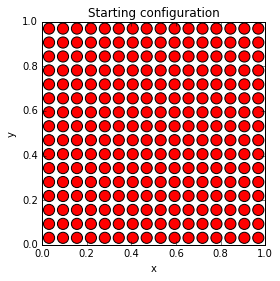

In [347]:
L = 1
m = 16
eta = 0.5
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G = square_lattice_PBC(L, m, r)
G.plot(title = "Starting configuration")

In [348]:
G.smart_MCMC_step(0.49*r, 1000000)

0.507509

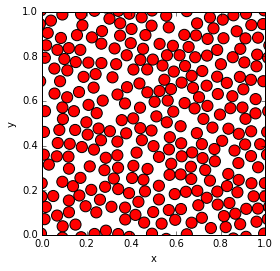

In [349]:
G.update_positions()
G.plot()

Radius:  0.0299206710301 Number of disks:  256 Density:  0.72


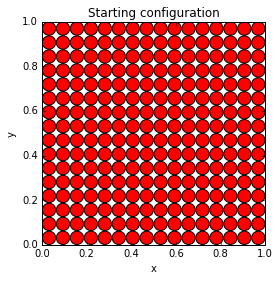

In [339]:
L = 1
m = 16
eta = 0.72
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G = square_lattice_PBC(L, m, r)
G.plot(title = "Starting configuration")

In [340]:
G.smart_MCMC_step(0.1*r, 1000000)

0.558451

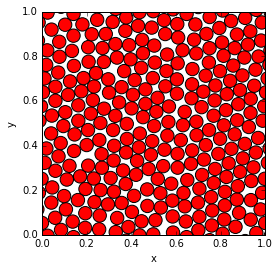

In [341]:
G.update_positions()
G.plot()

For $\eta = 0.5$ we are in the liquid phase: the system shows only local order and it is isotropic.  
For $\eta = 0.72$ we are in the hexatic phase: the system shows a quasi-long range hexagonal order and there is is hexagonal anisotropy.

### 2.4 Bonus: orientational order

In [10]:
def orientation(positions, L):
    # take the position and compute the 
    # orientational order parameter for 
    # each particle, then take the average
    # and do the absolute value.
    # The neighborhood of a particle is 
    # defined as the set of particles at 
    # distance <2.8*r from the particle.
    psi_i_list = []
    for i in xrange(0, len(positions)):
        number_of_neighbors = 0
        psi_i = 0
        for x, y in [pos for pos in positions if pos != positions[i]]:
            x_distance = positions[i][0]-x
            y_distance = positions[i][1]-y
            
            # PBC conditions
            if x_distance > L/2.0: x_distance -= L
            if y_distance > L/2.0: y_distance -= L
            if x_distance <= -L/2.0: x_distance += L
            if y_distance <= -L/2.0: y_distance += L
            
            distance = np.sqrt(x_distance**2 + y_distance**2)
            
            if distance < 2.8*r:
                number_of_neighbors += 1
                psi_i += e**((atan2(y-positions[i][1], x-positions[i][0]) + np.pi)*6j)
        
        # if the particle has no neighbors, go on
        if number_of_neighbors == 0:
            continue
        
        psi_i_list.append(psi_i/number_of_neighbors)
    
    # take the mean and its absolute value
    psi_i_list = np.mean(psi_i_list)
    mean_psi = np.absolute(psi_i_list)
    return mean_psi

Radius:  0.0249338925251 Number of disks:  256 Density:  0.5


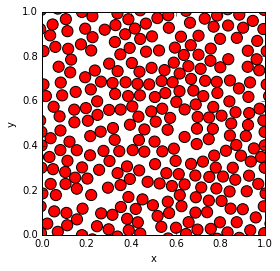

In [344]:
L = 1
m = 16
eta = 0.5
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G_liquid = square_lattice_PBC(L, m, r)
G_liquid.smart_MCMC_step(0.1*r, 1000000)
G_liquid.update_positions()
G_liquid.plot()

In [345]:
mean_psi_liquid = orientation(G_liquid.pos, G_liquid.L)
print mean_psi_liquid

0.0474349944765


Radius:  0.0299206710301 Number of disks:  256 Density:  0.72


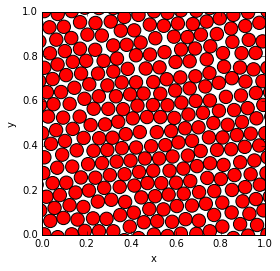

0.68077425315


In [7]:
L = 1
m = 16
eta = 0.72
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G_hexatic = square_lattice_PBC(L, m, r)
G_hexatic.smart_MCMC_step(0.1*r, 10000000)
G_hexatic.update_positions()
G_hexatic.plot()
mean_psi = orientation(G_hexatic.pos, G_hexatic.L)
print mean_psi

Radius:  0.0299206710301 Number of disks:  256 Density:  0.72


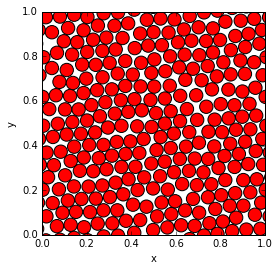

0.700575316189


In [11]:
L = 1
m = 16
eta = 0.72
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G_hexatic = square_lattice_PBC(L, m, r)
G_hexatic.smart_MCMC_step(0.1*r, 20000000)
G_hexatic.update_positions()
G_hexatic.plot()
mean_psi = orientation(G_hexatic.pos, G_hexatic.L)
print mean_psi

Radius:  0.0299206710301 Number of disks:  256 Density:  0.72


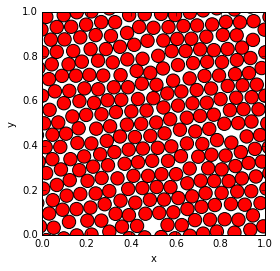

0.707678307014


In [12]:
L = 1
m = 16
eta = 0.72
r = L*np.sqrt(eta/np.pi)/m

print "Radius: ", r, "Number of disks: ", m**2, "Density: ", eta

G_hexatic = square_lattice_PBC(L, m, r)
G_hexatic.smart_MCMC_step(0.1*r, 50000000)
G_hexatic.update_positions()
G_hexatic.plot()
mean_psi = orientation(G_hexatic.pos, G_hexatic.L)
print mean_psi

$\langle \Psi_6 \rangle=1$ should be for a perfect hexagonal lattice.  
It is very close to zero for the liquid phase, where there is only short-range orientational order, while it is about $0.70$ for the hexatic phase, in which there is quasi-long range orientational order.